# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [5]:
import pandas as pd
df = pd.read_csv('data/human_body_temperature.csv')


In [2]:
# Your work here.

import matplotlib.pyplot as plt
import math
import numpy as np
get_ipython().magic('matplotlib inline')
df.head(2)


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0


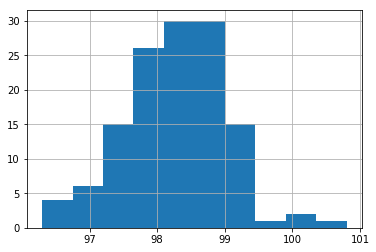

In [6]:
df['temperature'].hist()



In [14]:
size=len(df)
temp_mean=df['temperature'].mean()
temp_std=df['temperature'].std()
print(size)
print(temp_mean)
print(temp_std)

130
98.24923076923078
0.7331831580389454


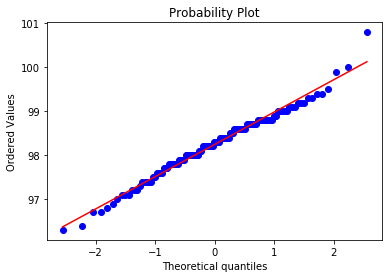

In [7]:
import scipy.stats as stats
import pylab

stats.probplot(df['temperature'], dist="norm", plot=pylab)
pylab.show()


3. Is the true population mean really 98.6 degrees F?
H0: µ = 98.6°F or
H0: Average body temperature is 98.6
HA: µ ≠ 98.6°F or
HA: Average body temperature is not 98.6°F

In [9]:
from statsmodels.stats.weightstats import ztest
ztest(df.temperature,value=98.6)
#stats.ttest_1samp(df.temperature,98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

p-value = P(Z ≤ −5.45 or Z ≥ 5.45)
= 2 x 4.9021570141012155e-08 < alpha (0.05)

p-value is very small and less than 0.05 so we reject null hypothesis.

Therefore we conclude that there is sufficient evidence to support the alternative
hypothesis that the average body temperature is different from 98.6ºF.

4. At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.
Calculate 95% confidence interval

In [15]:
sigma= temp_std/np.sqrt(size)
margin = 1.96*sigma #95% confidence
confidence_interval = [temp_mean-margin,temp_mean+margin]
confidence_interval

[98.123194112228518, 98.375267426233037]

If someone's temperature is above 98.3752 or below 98.1231, then we consider their temperature to be abnormal.

5. Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.

H0: µ(temp_male) = µ(temp_female)
HA: µ(temp_male) ≠ µ(temp_female)
The population standard deviation is not known so we will use a t-test. 
This test measures whether the average temperature differs significantly between males and females.


In [17]:
temp_female = np.array(df.temperature[df.gender=='F'])
temp_male = np.array(df.temperature[df.gender=='M'])

print(len(temp_female))
print(len(temp_male))

stats.ttest_ind(temp_female,temp_male)


65
65


Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

p-value = 2 x 0.024 = 0.048 < alpha (0.05)
p-value is less than 0.05. Therefore we reject the null hypothesis that the average temperature are the same bewteen males and females. Instead, t-test results is in favor of alternative hypothesis that average temperature are different between males and females.